# Day 1: Intro to Machine Learning
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_intro_ML.ipynb

## Activity MinMaxScaler
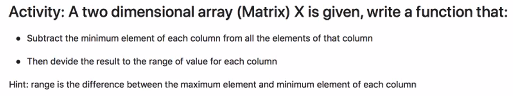

In [25]:
import numpy as np

X = np.array([[1000, 2], [1500, 3]])
print(X)
print("First column = ", X[:, 0])
print("Second column = ", X[:, 1])

print()
print("column-range =", X - X.min(axis=0))
print("range =", X.max(axis=0) - X.min(axis=0))

def max_min_s(X):
    col_minimum = X.min(axis=0) #get the minimum elements from (axis=0) all columns 
    col_range = X.max(axis=0) - col_minimum #get the range from each column by getting the max from each column and subtracting the minimum frm each column
    return (X - col_minimum) / col_range

print()
print("Result =", max_min_s(X))

[[1000    2]
 [1500    3]]
First column =  [1000 1500]
Second column =  [2 3]

column-range = [[  0   0]
 [500   1]]
range = [500   1]

Result = [[0. 0.]
 [1. 1.]]


### SKLearn version

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
print(X_minmax)

[[0. 0.]
 [1. 1.]]


## StandardScaler
## Acitivity: A two dimensional array (Matrix) X is given, write a function that:
- Subtract the mean element of each column from all the elements of that column
- Then diivide the result to the standard deviation of value for each column

In [33]:
X = np.array([[1000, 2], [1500, 3]])

def standard_s(X):
    col_mean = X.mean(axis=0)
    print("mean for each column", col_mean)
    col_std = X.std(axis=0)
    print("std for each column", col_std)
    return (X - col_mean) / col_std

print(standard_s(X))

mean for each column [1250.     2.5]
std for each column [250.    0.5]
[[-1. -1.]
 [ 1.  1.]]


### SKLearn version of preprecoessing package:

In [35]:
standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(X)
print(X_ss)

[[-1. -1.]
 [ 1.  1.]]


# Day 2: Simple Linear Regression

## Review of Linear Regression
- We want to present the relationship between two variables linearly
    - For example, recall the example relationship between running distance and drinking water
- In regression, we are interested in predicting a scalar-valued target, such as the price of a stock.
- By linear, we mean that the target must be predicted as a linear function of the inputs

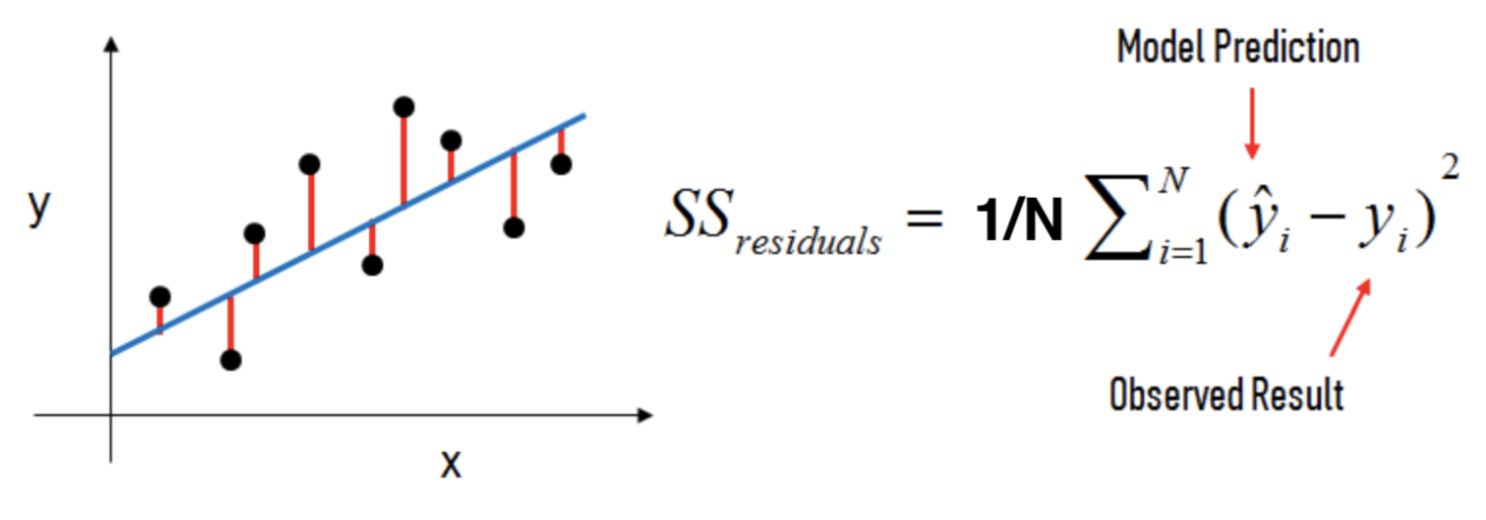
- Mean squared error
    - square to positive error, and to penalize data points with larger distance
- x is our feature and y is the target

## Activity:
We're going to revisit the example from QL with runners and water. You can assume that you are given the following data:

Distance that a runner has run (in Miles)
The amount of water that they drink (in Liters)
Get in groups of 3 to complete the following activity

### Given the below data, complete the following:
- Plot the scatter of distance versus water that consumed
- Find the best line that describes this relationship
- Plot the best line that you found

Text(0, 0.5, 'Water Drinks (Litre)')

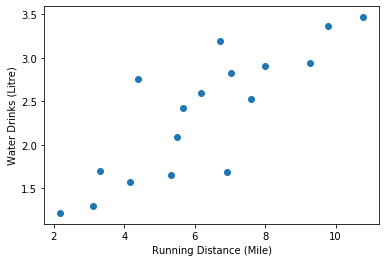

In [2]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

### Solution

In [5]:
# Reshape your data when passing to sklearn
### Passing 1-arrays as data is deprecated. Because of this,
### we must reshape our data using X.reshape(-1, 1) since our data has a single feature
print(X.reshape(-1, 1))

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]


In [8]:
# Obtain the best slope and intercept for the given data using sklearn
### Hints: The following documentation will be useful:
### LinearRegression
### Review the fit method in the above documentation
### Review the Attributes in the above documentation to see where to find the best slope and intercept
### Remember to reshape your data!

from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1)) # train the model (which is linear regression cna be train by X and Y)
print("Best slope=", lr_reg.coef_) # ask the model what is the best slope (after training)
print("Best y-intercept=", lr_reg.intercept_) #ask the model the best y intercept

Best slope= [[0.25163494]]
Best y-intercept= [0.79880123]


### Question:
Use the code you wrote above to predict how much water a runner will drink if they run for 5 miles

In [13]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

### Question: what are the metrics in order to evaluate Regression Model?
1. Mean-Squared-Error (MSE)
2. R-Squared: is a number between 0 to 1, close to one means better model


### Question:
What is the mean-squared-error of our Linear Regression Model?
##### Hints:
- Given the slope ($w_1$) and intercept ($w_0$), we can use the following formula to find the mean-square-error (MSE):
    - $MSE = f(w_1, w_0)=\frac{1}{N}\sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$
- How could the map function help you find y_predicted?

0.15385767404191164


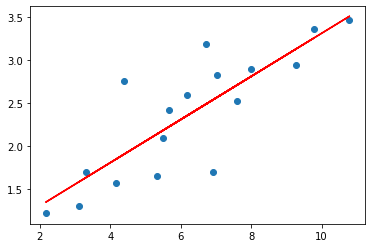

In [18]:
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(Y, y_predicted) ]) / len(Y)
print(error)

MSE= 0.15385767404191095


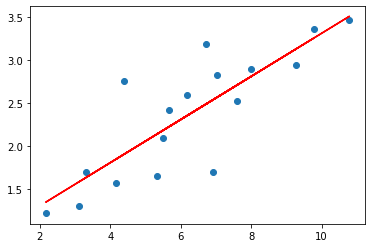

In [24]:
from sklearn.metrics import mean_squared_error

y_true = Y
y_pred = lr_reg.predict(X.reshape(-1,1))
plt.scatter(X, y_true) #plot the data points
plt.plot(X, y_pred, 'r') #plot the linear regression line
print("MSE=", mean_squared_error(y_true, y_pred)) #the closer to 0 the better

In [26]:
from sklearn.metrics import r2_score

y_true = Y
y_pred = lr_reg.predict(X.reshape(-1,1))
print(r2_score(y_true, y_pred)) #R squared = metric to represent how well our linear regression is. The closer to 1 the better

0.6928760302783605


In [27]:
# QL Review - Python way of getting slope intercept and MSE
import numpy as np

## Slope Intercept
def slope_intercept_LR(x, y):
    w1 = (np.mean([i*j for i, j in zip(x, y)]) - np.mean(x) * np.mean(y)) / (np.mean([i*i for i in x])) - np.mean(x) #this line maybe wrong check the last np.mean(x)
    w0 = np.mean(y) - w1.np.mean(x)
    return w1, w0

# print(slope_intercept_LR(X, Y))

## Mean Squared Error
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error / N
    return mse

## Activity: How much companies' sales would be based on their product advertisement?
- We have a dataset of 200 companies, comprised of the top 150 companies, and the bottom 50 companies.
- The top companies (150) spent money to advertise their product on TV, radio and newspaper
- Based on their advertisments, they have calculated the sale that they had
- For the bottom companies (50), they want to have an estimation for the following: if they spend X dollar, Y dollar and Z dollar on TV, radio and newspaper, respectively, how much would their predicted sales be?
- We will use the top 150 companies in our dataset to train the model, and the bottom 50 companies to check that the model is working correctly


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### TODO: Instansiate the model (Linear Regression) and train it
Use the top 150 companies to train the linear regression model. So the model does know about TV, Radio and Newspaper amount and also their sales for top 150 (75% of the dataset). However, we intentionally hide the sales for bottom 50 companies

In [40]:
df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Get the top 150 companies to train the Linear Regression Model with
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# Instansiate the model (Linear Regression) and train it
print("Generating a linear regression on the top 150 companies (first one)")
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

print("\nPrinting the coefficient and y intercept of our first 150 sales")
print("Slope for each column=\t", sales_reg.coef_)
print("Y-intercept=\t\t", sales_reg.intercept_)

Generating a linear regression on the top 150 companies (first one)

Printing the coefficient and y intercept of our first 150 sales
Slope for each column=	 [ 0.04700012  0.17993257 -0.00140273]
Y-intercept=		 3.029766796293691


#### TODO: Predict the botton 50 companies' sales

In [47]:
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_reg.predict(X_test))

print("\nTrained score=\t", sales_reg.score(X_test, Y_test)) #score from the linear regression model
print("Actual scores=\t", r2_score(Y_test, sales_reg.predict(X_test))) #actual score

Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]

Trained score=	 0.8963519785440216
Actual scores=	 0.8963519785440216


### Question: If a new company spends 100, 100, and 20 dollars on TV, radio and newspaper, respectively on advertising, how much sales would you predict they have?

In [46]:
sales_reg.predict([[100, 100, 20]])

array([25.69498118])

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Get the top 150 companies to train the Linear Regression Model with
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

W = np.array([ 0.04700012, 0.17993257, -0.00140273]) #from sales_reg.coef_
y_intercept = 3.029766796293691 #y - intercept

print("Columns=",df.columns)
print("151st company's values=", df.values[151, 1:4]) #the TV, radio, and newspaper for the 151st company
print("151st company's sales=", df.values[151, 4]) #sales for the 151st company
print("SUM=", sum(df.values[151, 1:4] * W) + y_intercept)
print("Actual=", 0.04700012*121 + 0.17993257*8.4 + -0.00140273*48.7 + y_intercept)

Columns= Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
151st company's values= [121.    8.4  48.7]
151st company's sales= 11.6
SUM= 10.15990195329369
Actual= 10.15990195329369
